### Using Pre-trained CNN network for audio classification 
#### Written by : Leo pauly | leopauly314@gmail.com

In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import pickle
import itertools
import numpy as np

import keras
from keras.models import model_from_json
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Using TensorFlow backend.


In [2]:
CLASSES = ["AC", "CH", "CP", "DB", "Dr", "EI", "GS", "Ja", "Si", "SM"]
np.random.seed(1337)  # for reproducibility

In [3]:
## Plotting confusion matrix
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [4]:
## Loading model
json_file = open("/nobackup/leopauly/S2LStage2/logdir_0/audio_classifier_mfcc.json", 'r')
#json_file = open("/nobackup/leopauly/S2LStage2/model.keras.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/nobackup/leopauly/S2LStage2/logdir_0/audio_classifier_mfcc.h5")
#loaded_model.load_weights("/nobackup/leopauly/S2LStage2/model.keras.h5")

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
loaded_model.compile(loss='sparse_categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])
print('Pretrained audio classifier model loaded!')

Pretrained audio classifier model loaded!


In [13]:
## Getting data
print("Start loading data")

#fd = open("/nobackup/leopauly/UrabanSound8k_Stored_mfcc/data_x_librosa_train_1.pkl", 'rb')
#fd2 = open("/nobackup/leopauly/UrabanSound8k_Stored_mfcc/data_y_librosa_train_1.pkl", 'rb')

fd = open("/nobackup/leopauly/UrabanSound8k_Stored_mfcc/data_x_librosa_train_1.pkl", 'rb')
fd2 = open("/nobackup/leopauly/UrabanSound8k_Stored_mfcc/data_y_librosa_train_1.pkl", 'rb')

features = pickle.load(fd,encoding='bytes')
labels = pickle.load(fd2,encoding='bytes')

print("Data loaded")

p_train = 0.8

rnd_indices = np.random.rand(len(labels)) < p_train

X_train = features[rnd_indices]
Y_train = labels[rnd_indices]
X_test = features[~rnd_indices]
Y_test = labels[~rnd_indices]

Start loading data
Data loaded


In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


## FIX FOR KERAS
# Y_train = Y_train.reshape((-1, 1))
Y_test = Y_test.reshape((-1, 1))

In [15]:
rnd_indices = np.random.rand(len(labels)) < p_train
print(rnd_indices)
print(Y_train)

[ True  True  True ...,  True  True  True]
[5 5 5 ..., 2 2 2]


10976/10984 [============================>.] - ETA: 0sConfusion matrix, without normalization


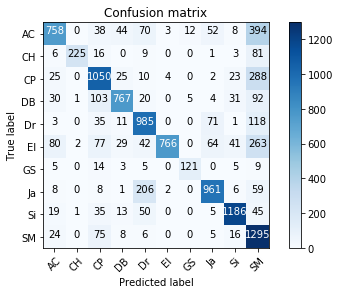

Got Predictions:  10984
Result:  8114  on  10984  ->  0.7387108521485798


In [16]:
## FIX FOR KERAS
# labels = labels.reshape((-1, 1))

## Prediction
predictions = loaded_model.predict_classes(X_test)

plot_confusion_matrix( cm=confusion_matrix(Y_test, predictions) , classes=CLASSES)

right = 0
total = 0

for idx in range(len(predictions)):
    if (predictions[idx] == Y_test[idx]):
        right += 1
    total += 1

## Decode and display prediction
print("Got Predictions: ", len(predictions))

print ("Result: ", str(right), " on ", str(total), " -> ", str( ( (right * 1.0) / total ) ))


In [17]:
accuracy_score(Y_test, predictions, normalize=True, sample_weight=None)

0.73871085214857979

In [18]:
print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          0       0.79      0.55      0.65      1379
          1       0.98      0.66      0.79       341
          2       0.72      0.74      0.73      1427
          3       0.85      0.73      0.79      1053
          4       0.70      0.80      0.75      1224
          5       0.99      0.56      0.72      1364
          6       0.88      0.75      0.81       162
          7       0.82      0.77      0.80      1251
          8       0.90      0.88      0.89      1354
          9       0.49      0.91      0.64      1429

avg / total       0.79      0.74      0.74     10984



In [19]:
print(labels.shape)

(54154,)


In [20]:
print(features.shape)

(54154, 40, 40, 3)


In [4]:
!nvidia-smi

Tue Jan 22 14:24:52 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:03:00.0 Off |                    0 |
| N/A   30C    P0    24W / 250W |      0MiB / 12193MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  